<a href="https://colab.research.google.com/github/engSalah-dot/Fashion-MINST/blob/main/%20Predicting%20Water%20Temperature%20from%20Salinity%20Using%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [42]:
df = pd.read_csv('bottle.csv')


/tmp/ipython-input-42-3421773862.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


         Salnty  T_degC
0       33.4400  10.500
1       33.4400  10.460
2       33.4370  10.460
3       33.4200  10.450
4       33.4210  10.450
...         ...     ...
864858  33.4083  18.744
864859  33.4083  18.744
864860  33.4150  18.692
864861  33.4062  18.161
864862  33.3880  17.533

[864863 rows x 2 columns]


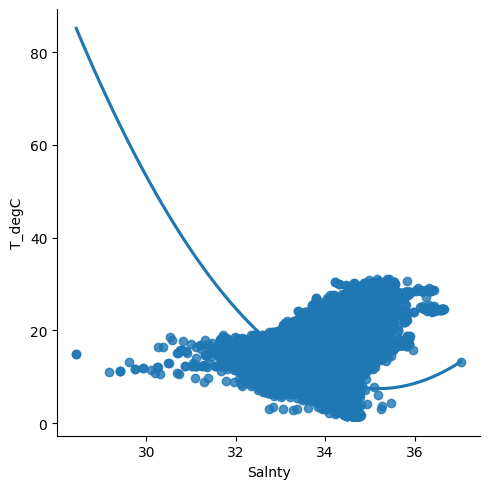

In [43]:
df_binary = df[['Salnty', 'T_degC']]

print(df_binary)
# Taking only the selected two attributes from the dataset
#display the first 5 rows
df_binary.head()
sns.lmplot(x ="Salnty", y ="T_degC", data = df_binary, order = 2, ci = None)
plt.show()

In [44]:
df_binary.fillna(method='ffill', inplace = True)

/tmp/ipython-input-44-3118249717.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method='ffill', inplace = True)
/tmp/ipython-input-44-3118249717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method='ffill', inplace = True)


In [45]:
X=np.array(df_binary['Salnty']).reshape(-1,1)
Y=np.array(df_binary['T_degC']).reshape(-1,1)



In [46]:
df_binary.dropna(inplace=True)

/tmp/ipython-input-46-2506039619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace=True)


In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.score(x_test, y_test))


0.20543091236469713


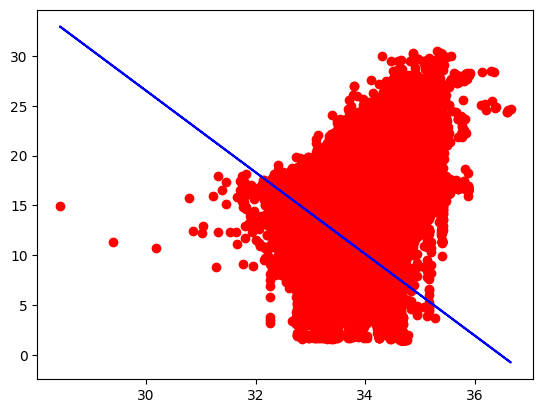

In [48]:
y_pred=reg.predict(x_test)
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,y_pred,color="b")


In [49]:
new_data=df_binary[:][:500]
new_data

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
...,...,...
495,34.269,4.90
496,34.310,4.50
497,34.311,4.48
498,34.319,4.21


/tmp/ipython-input-60-3155416897.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_data.fillna(method='ffill', inplace = True)
/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


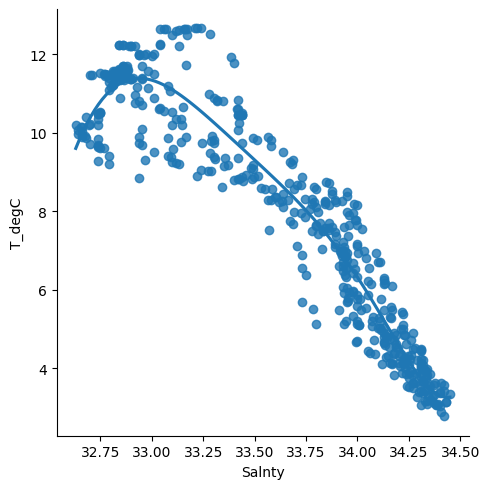

In [60]:
new_data.fillna(method='ffill', inplace = True)

# Selecting the 1st 500 rows of the data
sns.lmplot(x ="Salnty", y ="T_degC", data =new_data,
                               order = 10, ci = None)


In [61]:
X=np.array(new_data['Salnty']).reshape(-1,1)
Y=np.array(new_data['T_degC']).reshape(-1,1)

In [62]:
x_test,x_train,y_test,y_train=train_test_split(X,Y,test_size=0.2)

In [63]:
reg=LinearRegression()
reg.fit(x_train,y_train)
print(reg.score(x_test, y_test))

0.8512706550264081


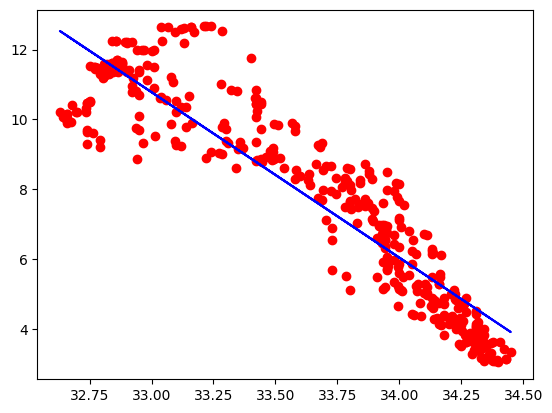

In [64]:
y_pred=reg.predict(x_test)
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,y_pred,color="b")
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.8764110495187813
MSE: 1.240004949198968
RMSE: 1.1135550948197255
